4장 신경망 학습

학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

손실함수: 신경망이 학습할 수 있도록 해주는 지표

학습의 목표: 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것

4.1 데이터에서 학습
신경망의 특징 : 데이터를 보고 학습할 수 있다. -> 가중치 매개변수의 값을 데이터를 보고 자동으로 결정         

* 선형 분리 가능 문제는 유한 번의 학습을 통해 풀 수 있다. -> 퍼셉트론 수렴 정리로 증명됨
비선형 분리 문제는 자동으로 학습할 수 없음

4.1.1 데이터 주도 학습  
기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도  
신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있는 중요한 특성을 지님  

이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.
특징: 입력 데이터에서 중요한 데이터를 정확하게 추출할 수 있도록 설계된 변환기  

이미지의 특징은 보통 벡터로 기술  
컴퓨터 비전에서는 SIFT, SURF, HOG 등의 특징을 많이 사용  

이미지 데이터를 벡터로 변환 -> 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습  

기계학습에서 이미지 벡터를 변환할 때 사용하는 특징은 여전히 사람이 설계한다.

딥러닝은 '종단간 기계학습(end-to-end machine learning)'이라고도 한다. '종단간'은 '처음부터 끝까지'라는 의미  데이터에서 목표한 결과를 사람의 개입 없이 얻는다는 뜻이다.



4.1.2 훈련 데이터와 시험 데이터  
기계학습 문제는 데이터를 훈련데이터와 시험데이터로 나눠 학습과 실험을 수행하는 것이 일반적  
1) 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다.  
2) 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가

왜 훈련 데이터와 시험 데이터를 나눌까? - 범용적으로 사용할 수 있는 모델을 구하려 하기 때문이다.
-> 범용능력을 제대로 평가하기 위해 훈련데이터와 시험데이터를 분리하는 것  

범용능력: 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력
-> 범용능력을 획득하는 것이 기계하습의 최종 목표  

한 데이터셋에만 지나치게 최적화된 상태를 오버피팅(overfitting)이라고 한다. -> 오버피팅을 피하는 것이 기계학습의 중요한 과제

4.2 손실 함수
신경망 학습에서 현재의 상태를 하나의 지표로 표현  
그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것  
신경망 학습에서 사용하는 지표는 손실 함수(loss function)라고 한다.  
손실 함수는 임의의 함수를 사용할 수 있지만, 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용  

손실 함수는 신경망 성능의 '나쁨'을 나타나는 지표로 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄  

4.2.1 평균 제곱 오차
평균 제곱 오차(mean squared error, MSE)   
E = $\frac{1}{2}\displaystyle\sum_{k}^{}{(y_k-t_k)^2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

한 원소만 1로 하고 그 외에는 0으로 나타내는 표기법을 '원-핫 인코딩' 이라한다.

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높은 경우
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# '7'일 확률이 가장 높은 경우
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y),np.array(t))

0.5975

4.2.2 교차 엔트로피 오차  
E = 
손실 함수로서 교차 엔트로피 오차(cross entropy error, CEE)도 자주 사용  
$-\displaystyle\sum_{k}^{}{t_k\log{y_k}}$      &nbsp;&nbsp;&nbsp;&nbsp; log는 밑이 e인 자연로그다.

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

4.2.3 미니배치 학습  
훈련 데이터 모두에 대한 손실 함수  
$-\frac{1}{N}\displaystyle\sum_{n}^{}\displaystyle\sum_{k}^{}{t_{nk}\log{y_{nk}}}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 교차 엔트로피를 모든 훈련 데이터에 대한 손실 함수로 바꾼 수식  
마지막에 N으로 나누어 정규화함 -> N으로 나눔으로써 '평균 손실 함수'를 구한 것  

모든 데이터를 대상으로 손실 함수의 합을 구하면 오래 걸린다. -> 데이터 일부를 추려 전체의 '근사치'로 이용 가능  
-> 미니배치(mini-batch)라 한다.  
이러한 방식을 사용하는 학습을 미니배치 학습이라 한다.

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =\
    load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
# 무작위로 10장만 빼내려면 어떻게 하면 될까?    ->    넘파이의 np.random.choice() 함수
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = x_train[batch_mask]

In [12]:
# 0 이상 60000 미만의 수 중에서 무작위로 10개 추출
np.random.choice(60000, 10)

array([ 9172, 18408, 20779, 53591, 32632, 24084, 48278, 41493,  3135,
       25657])

In [13]:
# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [14]:
# 위의 교차 엔트로피 오차에서 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 때의 교차 엔트로피
def cross_entroy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = t.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

4.2.5 왜 손실 함수를 설정하는가?  

궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것

'정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유가 뭘까? -> '미분'의 역할에 주목  
신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.  
가중치 매개변수의 손실 함수의 미분이란 '기중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'라는 의미  
미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.  
미분 값이 양수면 그 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.  
미분 값이 0이면 가중치 매개변수를 어느쪽으로 움직여도 손실 함수의 값은 달라지지 않습니다.  

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문  

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.  
-> '계단 함수'를 활성화 함수로 사용하지 않는 이유이기도 하다. 계단 함수의 미분은 대부분의 장소에서 0이다.  
그러므로 계단 함수를 이용하면 손실 함수를 지표로 삼는게 의미가 없다.  
매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않음


4.3.1 미분

'미분'은 '특정 순간'의 변화량을 뜻한다.

In [15]:
# 나쁜 구현 예  -> 반올림 오차 문제를 일으킨다.
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [16]:
def  numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2 * h)

In [17]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

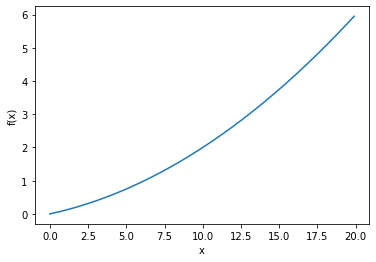

In [18]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [19]:
numerical_diff(function_1, 5)
numerical_diff(function_1, 10)

0.2999999999986347

4.3.3 편미분

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

변수가 여럿인 함수에 대한 미분을 편미분이라 한다.

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

4.4 기울기  
모든 변수의 편미분을 벡터로 정리한 것을 '기울기'라고 한다.

In [23]:
def numerical_gradient(f, x):
    h = 1e-4                     # 0.0001
    grad = np.zeros_like(x)      # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [25]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [26]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

4.4.1 경사법(경사 하강법)  
최적의 매개변수는 손실 함수가 최솟값이 될 때의 매개변수다.  
기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법  
경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동 -> 또 기울기를 구하고 그방향으로 이동 -> (반복)  

In [27]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [29]:
# 학습률이 너무 큰 예: lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [30]:
# 학습률이 너무 작은 예: lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x= init_x, lr=1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2, 3)    # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [32]:
net = simpleNet()
print(net.W)

[[-0.22028069  0.11545395 -0.21566813]
 [ 1.68197772  0.07172272  2.31901246]]


In [33]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[1.38161153 0.13382282 1.95771034]


In [34]:
np.argmax(p)

2

In [35]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.5443476510666067

In [36]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19568043  0.05618749 -0.25186792]
 [ 0.29352064  0.08428124 -0.37780188]]


In [37]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

#### 4.5 학습 알고리즘 구현하기  

##### 신경망 학습 절차

- 전제  
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.  
신경망 학습은 다음과 같이 4단계로 수행  

- 1단계: 미니배치  
훈련 데이터 중 일부를 무작위로 가져온다. 선별한 데이터를 미니배치라 한다. 미니배치의 손실 함수 값을 줄이는 것이 목표  

- 2단계: 기울기 산출  
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향 제시  

- 3단계: 매개변수 갱신  
가중치 매개변수를 기울기 방향으로 조금씩 갱신  

- 4단계: 반복
1~3 단계 반복  

경사 하강법으로 매개변수를 갱신하는 방법이며, 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(stochastic gradient descent, SGD)라고 부른다.

In [38]:
# 4.5.1 2층 신경망 클래스 구현하기

import sys, os
sys.path.append(os.pardir)
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y= self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [39]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100, )
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10, 1)

(10,)

In [40]:
# 4.5.2 미니배치 학습 구현하기
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 10    # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [41]:
grad    # 기울기

{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([-7.61759367e-04, -3.29258918e-04, -2.72299499e-04, -1.20235510e-04,
        -1.04181948e-03, -1.55159666e-03,  7.42861979e-04, -2.75164269e-05,
        -6.96534035e-04, -9.45264853e-04, -1.31851900e-03, -8.12939418e-04,
        -3.73856812e-04, -6.61182469e-04, -8.92491616e-04,  1.28454314e-05,
        -3.71402589e-04, -2.93358271e-05,  4.52321247e-05, -1.94030643e-04,
         4.39044496e-04,  2.64663480e-04,  3.53052492e-04, -3.83903245e-04,
        -1.55781439e-04, -1.65616328e-03, -1.17456384e-03, -1.26638491e-04,
        -3.68266113e-04, -7.72188529e-04,  7.43381425e-04, -1.13093688e-03,
        -1.42815429e-03,  1.67787085e-03,  1.57485021e-04,  1.02747092e-03,
         4.66751904e-05, -8.85767961e-04, -6.51350192e-

In [42]:
network.params # 매개변수 최종

{'W1': array([[-0.00836409, -0.01114407,  0.00212226, ...,  0.00857111,
         -0.00053286,  0.00684899],
        [ 0.00942402, -0.00456101,  0.00194119, ..., -0.00355991,
         -0.00825246,  0.00390427],
        [-0.00360707, -0.01381233,  0.00024959, ..., -0.00398042,
          0.00305629,  0.00924936],
        ...,
        [ 0.00338017,  0.01436654, -0.00876726, ..., -0.01065922,
          0.00249505,  0.00417061],
        [-0.00485614, -0.0165996 , -0.01806027, ...,  0.00416631,
         -0.01273886,  0.00619001],
        [-0.00061926, -0.00803638,  0.0075701 , ..., -0.02177833,
         -0.01448065, -0.00891673]]),
 'b1': array([-1.95200032e-04, -3.33134928e-04, -4.13491268e-04, -3.44037982e-04,
        -1.92665156e-04, -2.39306302e-04, -5.47249714e-04, -3.80159546e-04,
        -2.85522893e-04, -3.53911934e-04, -2.52073964e-04, -1.65703002e-04,
        -3.72488988e-04, -3.01868357e-04, -2.92128945e-04, -3.99264303e-04,
        -2.89788330e-04, -3.73635194e-04, -4.15568983e-04

In [43]:
loss

2.0955870033882205

In [44]:
train_loss_list

[2.1756867723245015,
 2.24414741157253,
 2.2615685650921824,
 2.2092216964409457,
 2.2650152356636446,
 2.2732139243949834,
 2.218619897549307,
 2.235618052198526,
 2.316292958228103,
 2.0955870033882205]

4.5.3 시험 데이터로 평가하기  
손실 함수의 값이 줄어드는 것을 확인할 수 있었다.  
이때의 손실 함수의 값이란 '훈련 데이터의 미니배치에 대한 손실 함수'의 값이다.  
훈련 데이터의 손실 함수의 값이 작아지는 것은 신경망이 잘 학습하고 있음을 뜻한다.  
하지만 이 결과로는 다른 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않다.  

에폭(epoch)  
1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당  
ex) 훈련 데이터 10,000개를 100개의 미니배치로 학습하는 경우에  
확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터는 소진된다.  
100회가 1에폭이 된다.  

In [47]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10                  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 10                 # 미니배치  크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))
        


train acc, test acc | 0.11236666666666667, 0.1135


오버피팅이 일어나면 갑자기 정확도가 떨어지는 지점이 생긴다. 그 순간이 오버피팅이 시작되는 순간이다.

4.6 정리  

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.  
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가  
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신  
- 가중치 매개변수를 갱신할 때 가중치 매개변수의 기울기를 이용, 기울어진 방향으로 가중치의 값을 갱신하는 작업 반복  
- 아주 작은 값을 주었을 때의 차분으로 미분한는 것을 수치 미분  
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.  
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단  

5장에서는 오차역전파법이라는 방법으로 기울기를 고속으로 구할 수 있다.  